<a href="https://colab.research.google.com/github/woneuy01/AudioToText/blob/master/Reddit_n_gram_machinelearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wordcloud
!pip install imagecolor

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Processing corpus: 3 documents


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'ve", '19', 'abov', 'becaus', 'befor', 'coronaviru', 'daili', 'dure', 'onc', 'onli', 'ourselv', 'peopl', 'studi', 'themselv', 'theori', 'veri', 'wa', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))



Resulting matrix has 3 data points and 2729 features.

[('pytorch', 0.4471281777801168), ('time', 0.335938819219559), ('tensorflow', 0.3261042081656547), ('human', 0.2704567612234492), ('nlp', 0.26122242341506546), ('gan', 0.24984457906644966), ('reinforc', 0.2324155032127878), ('cnn', 0.22337444483223332), ('gpu', 0.22161022640765143), ('featur', 0.2172265736132727), ('text', 0.20995862926723868), ('seri', 0.19718695899975258), ('amp', 0.1964372783783908), ('speech', 0.19133213526802878), ('make', 0.1909863201188653), ('like', 0.18520884140561622), ('label', 0.18381501548674595), ('without', 0.18339185531910773), ('experi', 0.18199802940023743), ('googl', 0.1699232720921865), ('product', 0.16922635913275133), ('set', 0.16880319896511314), ('loss', 0.16190564712479072), ('/', 0.15981490824648525), ('graph', 0.1586948351194119), ('represent', 0.15827167495177372), ('approach', 0.1531911091979598), ('contrast', 0.15205839751443323), ('autoencod', 0.15164787590324824), ('releas', 0.15095

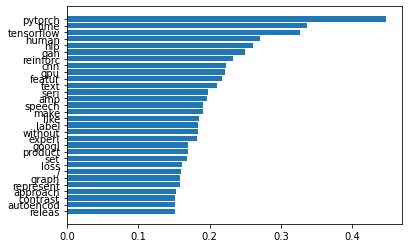

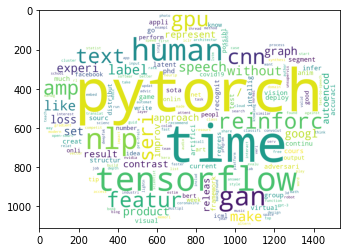

In [ ]:
#stemming 1-gram
import collections
import nltk
import os
from wordcloud import WordCloud
from PIL import Image, ImageColor 
nltk.download('stopwords')
nltk.download('punkt')
from sklearn import(
    datasets, feature_extraction
)
import matplotlib.pyplot as plt 
import numpy as np
from nltk.stem import PorterStemmer
from sklearn import feature_extraction

sa_stop_words=nltk.corpus.stopwords.words("english")
#['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 
#'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 
#'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll",
# 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 
#'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about',
# 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out',
# 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 
#'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 
#'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 
#'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't",
# 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
# "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

add_list = ["'s", "also",".",",","us","19.","?","thi", "hi","n't","'re"
            "''","coronavirus","covid-19","’",":","say","‘","report","may",
            "ha","'","``", "day", "video", "daily", "suggest","-", "%","discuss", "|", "theory", "post", "question",
            "daily","imag","comment","american", "show", "people",
            "image","videos", "video","suggestions", "suggestion", "discussion", "study","amid",
            "[", "]", "learn","model", ")","(","use","(","ml","project", "research","machine", "paper", 
            "ai", "data", "neural", "network", "deep", "gener","train", "n","code","dataset", "detect", "2020", "ani","!","doe",
            "''", "r","p","machin","whi", "new","engin", "object","analysi", "need","anyon", "comput",  "help", "python", "+", "open",
            "work","predict","transform","optim","librari","algorithm","classif", "implement","languag", 
            "read","vs", "best", "tool", "would","look", ";","problem", "get", "confer","one", "differ",
            "simpl","find","review", "base",  "publish","state","handl", "understand", "2","system", "news", "face", "explain","&" 
            ]

not_stopwords=[ 'against','no', 'nor','aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't",
 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
"wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't" 
#,'not' delete only in modelling
]

sa_stop_words.extend(add_list)        
sa_stop_words = list(set([word for word in sa_stop_words if word not in not_stopwords]))


data_directory = 'youtube'
youtube_data=datasets.load_files(data_directory, shuffle =True)
print('Processing corpus: {} documents'.format(len(youtube_data.data)))


stemmer = PorterStemmer()

def tokenize(text):
        tokens = [word for word in nltk.word_tokenize(text)] 
        stems = [stemmer.stem(item) for item in tokens]
        return stems
count_vectorizer = feature_extraction.text.CountVectorizer(
        lowercase=True,  # for demonstration, True by default
        tokenizer=tokenize,  # use the NLTK tokenizer
        min_df=1,  # minimum document frequency, i.e. the word must appear more than once.  
        ngram_range=(1, 1),
        stop_words=sa_stop_words
    )
#print('Count Vectorizer:\n')

X = count_vectorizer.fit_transform(youtube_data.data)
X = feature_extraction.text.TfidfTransformer().fit_transform(X)
#print(count_vectorizer.vocabulary_)


print('\nResulting matrix has {} data points and {} features.\n'.format(
    X.shape[0], X.shape[1]))
#print('Document 1: \n{}'.format(X[0].toarray()))


sum_words = X.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq[:30]

#select key and value from tuple
y=[val[1] for val in words_freq[:30]]
x=[val[0] for val in words_freq[:30]]

print(words_freq[0:30])
y_pos = np.arange(len(x))
# Create horizontal bars
plt.barh(y_pos, y)
# Create names on the y-axis
plt.yticks(y_pos, x)
plt.gca().invert_yaxis()
# Show graphic
plt.show()

#word cloud 
dict_w={}
for k,v in words_freq:
  dict_w[k]=v
cloud_mask = np.array(Image.open("cloud.png")) # cloud shape image
wc = WordCloud(stopwords=sa_stop_words,
                        background_color="white",#ImageColor.getcolor('#36394c', 'RGB')
                        width=400,
                        height=400,
                        scale=3,
                        mask=cloud_mask#,
                        #color_func=partial(color_func, dictionary=words_dict)
                        ).generate_from_frequencies(dict_w)
plt.imshow(wc)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Processing corpus: 3 documents


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'ve", '19', 'abov', 'becaus', 'befor', 'coronaviru', 'daili', 'dure', 'onc', 'onli', 'ourselv', 'peopl', 'studi', 'themselv', 'theori', 'veri', 'wa', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))



Resulting matrix has 3 data points and 6441 features.

[('time seri', 0.14704846509809277), ('artifici intellig', 0.11476686595194845), ('wayr week', 0.08599374070105192), ('pytorch lightn', 0.08500375279743981), ('style transfer', 0.06649163031213158), ('latent space', 0.0642270483985155), ('speech recognit', 0.06245736260399473), ('curl contrast', 0.061799938255061276), ('contrast unsupervis', 0.061799938255061276), ('unsupervis represent', 0.061799938255061276), ('represent reinforc', 0.061799938255061276), ('random forest', 0.061799938255061276), ('depth estim', 0.06167746904766459), ('broader impact', 0.05984775148479543), ('impact statement', 0.05984775148479543), ('tensorflow 2.2', 0.05984775148479543), ('facial recognit', 0.05984775148479543), ('2080 ti', 0.05984775148479543), ('kaggl competit', 0.049550025315242316), ('variat autoencod', 0.049550025315242316), ('activ function', 0.049550025315242316), ('valid accuraci', 0.049055129196147004), ('adversari attack', 0.0488880447

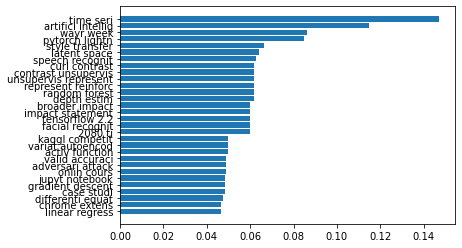

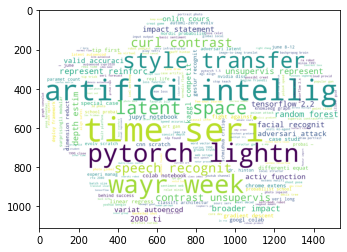

In [ ]:
#stemming 2-gram
import collections
import nltk
import os
from wordcloud import WordCloud
from PIL import Image, ImageColor 
nltk.download('stopwords')
nltk.download('punkt')
from sklearn import(
    datasets, feature_extraction
)
import matplotlib.pyplot as plt 
import numpy as np
from nltk.stem import PorterStemmer
from sklearn import feature_extraction

sa_stop_words=nltk.corpus.stopwords.words("english")

add_list = ["'s", "also",".",",","us","19.","?","thi", "hi","n't","'re"
            "''","coronavirus","covid-19","’",":","say","‘","report","may",
            "ha","'","``", "day", "video", "daily", "suggest","-", "%","discuss", "|", "theory", "post", "question",
            "daily","imag","comment","american", "show", "people",
            "image","videos", "video","suggestions", "suggestion", "discussion", "study","amid",
            "[", "]", "learn","model", ")","(","use","(","ml","project", "research","machine", "paper", 
            "ai", "data", "neural", "network", "deep", "gener","train", "n","code","dataset", "detect", "2020", "ani","!","doe",
            "''", "r","p","machin","whi", "new","engin", "object","analysi", "need","anyon", "comput",  "help", "python", "+", "open",
            "work","predict","transform","optim","librari","algorithm","classif", "implement","languag", 
            "read","vs", "best", "tool", "would","look", ";","problem", "get", "confer","one", "differ",
            "simpl","find","review", "base",  "publish","state","handl", "understand", "2","system", "news", "face", "explain","&" 
            ]

not_stopwords=[ 'against','no', 'nor','aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't",
 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
"wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't" 
#,'not' delete only in modelling
]

sa_stop_words.extend(add_list)        
sa_stop_words = list(set([word for word in sa_stop_words if word not in not_stopwords]))      


data_directory = 'youtube'
youtube_data=datasets.load_files(data_directory, shuffle =True)
print('Processing corpus: {} documents'.format(len(youtube_data.data)))


stemmer = PorterStemmer()

def tokenize(text):
        tokens = [word for word in nltk.word_tokenize(text)] 
        stems = [stemmer.stem(item) for item in tokens]
        return stems
count_vectorizer = feature_extraction.text.CountVectorizer(
        lowercase=True,  # for demonstration, True by default
        tokenizer=tokenize,  # use the NLTK tokenizer
        min_df=1,  # minimum document frequency, i.e. the word must appear more than once.  
        ngram_range=(2, 2),
        stop_words=sa_stop_words
    )
#print('Count Vectorizer:\n')

X = count_vectorizer.fit_transform(youtube_data.data)
X = feature_extraction.text.TfidfTransformer().fit_transform(X)
#print(count_vectorizer.vocabulary_)


print('\nResulting matrix has {} data points and {} features.\n'.format(
    X.shape[0], X.shape[1]))
#print('Document 1: \n{}'.format(X[0].toarray()))


sum_words = X.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq[:30]

#select key and value from tuple
y=[val[1] for val in words_freq[:30]]
x=[val[0] for val in words_freq[:30]]

print(words_freq[0:30])

y_pos = np.arange(len(x))
# Create horizontal bars
plt.barh(y_pos, y)
# Create names on the y-axis
plt.yticks(y_pos, x)
plt.gca().invert_yaxis()
# Show graphic
plt.show()

#word cloud 
dict_w={}
for k,v in words_freq:
  dict_w[k]=v
cloud_mask = np.array(Image.open("cloud.png")) # cloud shape image
wc = WordCloud(stopwords=sa_stop_words,
                        background_color="white",#ImageColor.getcolor('#36394c', 'RGB')
                        width=400,
                        height=400,
                        scale=3,
                        mask=cloud_mask#,
                        #color_func=partial(color_func, dictionary=words_dict)
                        ).generate_from_frequencies(dict_w)
plt.imshow(wc)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Processing corpus: 3 documents


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'ve", '19', 'abov', 'becaus', 'befor', 'coronaviru', 'daili', 'dure', 'onc', 'onli', 'ourselv', 'peopl', 'studi', 'themselv', 'theori', 'veri', 'wa', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))



Resulting matrix has 3 data points and 6651 features.

[('curl contrast unsupervis', 0.06233365262013023), ('contrast unsupervis represent', 0.06233365262013023), ('unsupervis represent reinforc', 0.06233365262013023), ('broader impact statement', 0.06038005442863106), ('nordic probabilist school', 0.04470492907396564), ('probabilist school probai', 0.04470492907396564), ('school probai —', 0.04470492907396564), ('probai — june', 0.04470492907396564), ('— june 8-12', 0.04470492907396564), ('automl-zero evolv scratch', 0.04470492907396564), ('adversari latent autoencod', 0.04155576841342015), ('latent autoencod cvpr2020', 0.04155576841342015), ('3d photo inpaint', 0.04155576841342015), ('ieee ra robot', 0.04155576841342015), ('ra robot podcast', 0.04155576841342015), ('yolov4 speed accuraci', 0.04155576841342015), ('special case artifici', 0.04155576841342015), ('case artifici curios', 0.04155576841342015), ('artifici curios 1990', 0.04155576841342015), ('curios 1990 close', 0.04155576

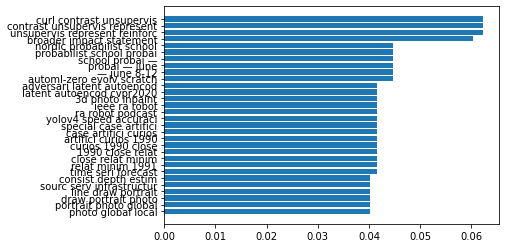

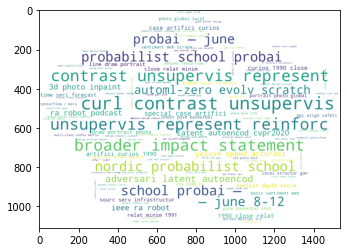

In [ ]:
#stemming 3-gram
import collections
import nltk
import os
from wordcloud import WordCloud
from PIL import Image, ImageColor 
nltk.download('stopwords')
nltk.download('punkt')
from sklearn import(
    datasets, feature_extraction
)
import matplotlib.pyplot as plt 
import numpy as np
from nltk.stem import PorterStemmer
from sklearn import feature_extraction

sa_stop_words=nltk.corpus.stopwords.words("english")
add_list = ["'s", "also",".",",","us","19.","?","thi", "hi","n't","'re"
            "''","coronavirus","covid-19","’",":","say","‘","report","may",
            "ha","'","``", "day", "video", "daily", "suggest","-", "%","discuss", "|", "theory", "post", "question",
            "daily","imag","comment","american", "show", "people",
            "image","videos", "video","suggestions", "suggestion", "discussion", "study","amid",
            "[", "]", "learn","model", ")","(","use","(","ml","project", "research","machine", "paper", 
            "ai", "data", "neural", "network", "deep", "gener","train", "n","code","dataset", "detect", "2020", "ani","!","doe",
            "''", "r","p","machin","whi", "new","engin", "object","analysi", "need","anyon", "comput",  "help", "python", "+", "open",
            "work","predict","transform","optim","librari","algorithm","classif", "implement","languag", 
            "read","vs", "best", "tool", "would","look", ";","problem", "get", "confer","one", "differ",
            "simpl","find","review", "base",  "publish","state","handl", "understand", "2","system", "news", "face", "explain","&" 
            ]

not_stopwords=[ 'against','no', 'nor','aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't",
 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
"wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't" 
#,'not' delete only in modelling
]

sa_stop_words.extend(add_list)        
sa_stop_words = list(set([word for word in sa_stop_words if word not in not_stopwords]))       


data_directory = 'youtube'
youtube_data=datasets.load_files(data_directory, shuffle =True)
print('Processing corpus: {} documents'.format(len(youtube_data.data)))


stemmer = PorterStemmer()

def tokenize(text):
        tokens = [word for word in nltk.word_tokenize(text)] 
        stems = [stemmer.stem(item) for item in tokens]
        return stems
count_vectorizer = feature_extraction.text.CountVectorizer(
        lowercase=True,  # for demonstration, True by default
        tokenizer=tokenize,  # use the NLTK tokenizer
        min_df=1,  # minimum document frequency, i.e. the word must appear more than once.  
        ngram_range=(3, 3),
        stop_words=sa_stop_words
    )
#print('Count Vectorizer:\n')

X = count_vectorizer.fit_transform(youtube_data.data)
X = feature_extraction.text.TfidfTransformer().fit_transform(X)
#print(count_vectorizer.vocabulary_)


print('\nResulting matrix has {} data points and {} features.\n'.format(
    X.shape[0], X.shape[1]))
#print('Document 1: \n{}'.format(X[0].toarray()))


sum_words = X.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq[:30]

#select key and value from tuple
y=[val[1] for val in words_freq[:30]]
x=[val[0] for val in words_freq[:30]]
print(words_freq[0:30])
y_pos = np.arange(len(x))
# Create horizontal bars
plt.barh(y_pos, y)
# Create names on the y-axis
plt.yticks(y_pos, x)
plt.gca().invert_yaxis()
# Show graphic
plt.show()

#word cloud 
dict_w={}
for k,v in words_freq:
  dict_w[k]=v
cloud_mask = np.array(Image.open("cloud.png")) # cloud shape image
wc = WordCloud(stopwords=sa_stop_words,
                        background_color="white",#ImageColor.getcolor('#36394c', 'RGB')
                        width=400,
                        height=400,
                        scale=3,
                        mask=cloud_mask#,
                        #color_func=partial(color_func, dictionary=words_dict)
                        ).generate_from_frequencies(dict_w)
plt.imshow(wc)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
Processing corpus: 3 documents


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'ve", '19'] not in stop_words.
  'stop_words.' % sorted(inconsistent))



Resulting matrix has 3 data points and 3080 features.

[('pytorch', 0.43530266944561985), ('time', 0.32568430278438604), ('tensorflow', 0.31628326431944614), ('detection', 0.2725732444709846), ('classification', 0.2722467140776762), ('library', 0.26630942991181694), ('analysis', 0.26444272307175887), ('make', 0.25377116754110474), ('nlp', 0.25360258571826216), ('anyone', 0.23590244403125393), ('generate', 0.22870527605205726), ('reinforcement', 0.2263328237434714), ('human', 0.21947281940995994), ('feature', 0.21193848778507807), ('optimization', 0.19532964808856462), ('amp', 0.19203447561232662), ('series', 0.19125907076276336), ('speech', 0.1852025100531473), ('engineer', 0.18389332096072408), ('datasets', 0.18312854936353767), ('label', 0.17890002346727063), ('without', 0.17873144164442806), ('text', 0.17372751089859778), ('language', 0.17355892907575515), ('cnns', 0.16962152972032796), ('like', 0.16933040317948814), ('google', 0.16525982585368687), ('conference', 0.165259825853686

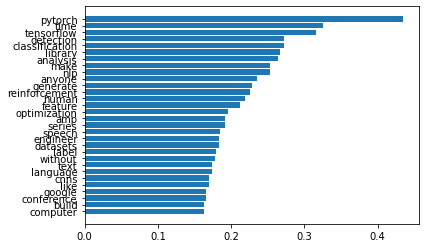

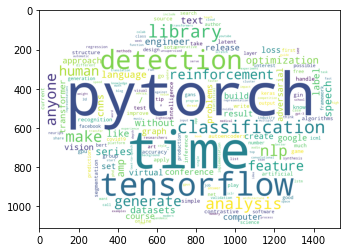

In [ ]:
#lemmatization 1-gram
import collections
import nltk
import os
from wordcloud import WordCloud
from PIL import Image, ImageColor 
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from sklearn import(
    datasets, feature_extraction
)
import matplotlib.pyplot as plt 
import numpy as np
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

from sklearn import feature_extraction

sa_stop_words=nltk.corpus.stopwords.words("english")

add_list = ["'s", "also",".",",","us","19.","?","thi", "hi","n't","'re"
            "''","coronavirus","covid-19","’",":","say","‘","report","may",
            "ha","'","``", "day", "video", "daily", "suggest","-", "%","discuss", "|", "theory", "post", "question",
            "daily","imag","comment","american", "show", "people",
            "image","videos", "video","suggestions", "suggestion", "discussion", "study","amid",
            "[", "]", "learn","model", ")","(","use","(","ml","project", "research","machine", "paper", 
            "ai", "data", "neural", "network", "deep", "gener","train", "n","code","dataset", "detect", "2020", "ani","!","doe",
            "''", "r","p","machin","whi", "new","engin", "object","analysi", "need","anyon", "comput",  "help", "python", "+", "open",
            "work","predict","transform","optim","librari","algorithm","classif", "implement","languag", 
            "read","vs", "best", "tool", "would","look", ";","problem", "get", "confer","one", "differ",
            "simpl","find","review", "base",  "publish","state","handl", "understand", "2","system", "news", "face", "explain","&" 
            ]

not_stopwords=[ 'against','no', 'nor','aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't",
 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
"wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't" 
#,'not' delete only in modelling
]

sa_stop_words.extend(add_list)        
sa_stop_words = list(set([word for word in sa_stop_words if word not in not_stopwords]))      


data_directory = 'youtube'
youtube_data=datasets.load_files(data_directory, shuffle =True)
print('Processing corpus: {} documents'.format(len(youtube_data.data)))


#stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

def tokenize(text):
        tokens = [word for word in nltk.word_tokenize(text)] 
        lemma = [wordnet_lemmatizer.lemmatize(item,pos="v") for item in tokens]
        return lemma
count_vectorizer = feature_extraction.text.CountVectorizer(
        lowercase=True,  # for demonstration, True by default
        tokenizer=tokenize,  # use the NLTK tokenizer
        min_df=1,  # minimum document frequency, i.e. the word must appear more than once.  
        ngram_range=(1, 1),
        stop_words=sa_stop_words
    )
#print('Count Vectorizer:\n')

X = count_vectorizer.fit_transform(youtube_data.data)
X = feature_extraction.text.TfidfTransformer().fit_transform(X)
#print(count_vectorizer.vocabulary_)


print('\nResulting matrix has {} data points and {} features.\n'.format(
    X.shape[0], X.shape[1]))
#print('Document 1: \n{}'.format(X[0].toarray()))


sum_words = X.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq[:30]

#select key and value from tuple
y=[val[1] for val in words_freq[:30]]
x=[val[0] for val in words_freq[:30]]

print(words_freq[0:30])

y_pos = np.arange(len(x))
# Create horizontal bars
plt.barh(y_pos, y)
# Create names on the y-axis
plt.yticks(y_pos, x)
plt.gca().invert_yaxis()
# Show graphic
plt.show()

#word cloud 
dict_w={}
for k,v in words_freq:
  dict_w[k]=v
cloud_mask = np.array(Image.open("cloud.png")) # cloud shape image
wc = WordCloud(stopwords=sa_stop_words,
                        background_color="white",#ImageColor.getcolor('#36394c', 'RGB')
                        width=400,
                        height=400,
                        scale=3,
                        mask=cloud_mask#,
                        #color_func=partial(color_func, dictionary=words_dict)
                        ).generate_from_frequencies(dict_w)
plt.imshow(wc)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Processing corpus: 3 documents


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'ve", '19'] not in stop_words.
  'stop_words.' % sorted(inconsistent))



Resulting matrix has 3 data points and 6825 features.

[('time series', 0.14260597983411627), ('computer vision', 0.13123789434696986), ('virtual conference', 0.08384916888546345), ('wayr week', 0.08340936543586645), ('pytorch lightning', 0.08237258882213956), ('artificial intelligence', 0.08002915046263104), ('style transfer', 0.06482434356528487), ('latent space', 0.062356650871754446), ('speech recognition', 0.06045528519567253), ('curl contrastive', 0.0599774815848361), ('contrastive unsupervised', 0.0599774815848361), ('unsupervised representations', 0.0599774815848361), ('representations reinforcement', 0.0599774815848361), ('random forest', 0.0599774815848361), ('depth estimation', 0.059686573554487664), ('simple thread', 0.059120246537039144), ('broader impact', 0.057743525672778954), ('impact statement', 0.057743525672778954), ('tensorflow 2.2', 0.057743525672778954), ('facial recognition', 0.057743525672778954), ('2080 ti', 0.057743525672778954), ('anyone know', 0.0577435256

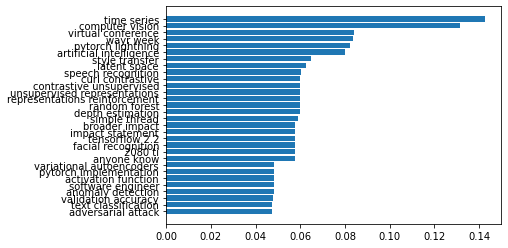

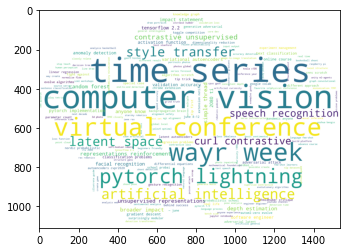

In [ ]:
#lemmatization 2-gram
import collections
import nltk
import os
from wordcloud import WordCloud
from PIL import Image, ImageColor 
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from sklearn import(
    datasets, feature_extraction
)
import matplotlib.pyplot as plt 
import numpy as np
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

from sklearn import feature_extraction

sa_stop_words=nltk.corpus.stopwords.words("english")

add_list = ["'s", "also",".",",","us","19.","?","thi", "hi","n't","'re"
            "''","coronavirus","covid-19","’",":","say","‘","report","may",
            "ha","'","``", "day", "video", "daily", "suggest","-", "%","discuss", "|", "theory", "post", "question",
            "daily","imag","comment","american", "show", "people",
            "image","videos", "video","suggestions", "suggestion", "discussion", "study","amid",
            "[", "]", "learn","model", ")","(","use","(","ml","project", "research","machine", "paper", 
            "ai", "data", "neural", "network", "deep", "gener","train", "n","code","dataset", "detect", "2020", "ani","!","doe",
            "''", "r","p","machin","whi", "new","engin", "object","analysi", "need","anyon", "comput",  "help", "python", "+", "open",
            "work","predict","transform","optim","librari","algorithm","classif", "implement","languag", 
            "read","vs", "best", "tool", "would","look", ";","problem", "get", "confer","one", "differ",
            "simpl","find","review", "base",  "publish","state","handl", "understand", "2","system", "news", "face", "explain","&" 
            ]

not_stopwords=[ 'against','no', 'nor','aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't",
 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
"wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't" 
#,'not' delete only in modelling
]

sa_stop_words.extend(add_list)        
sa_stop_words = list(set([word for word in sa_stop_words if word not in not_stopwords]))      


data_directory = 'youtube'
youtube_data=datasets.load_files(data_directory, shuffle =True)
print('Processing corpus: {} documents'.format(len(youtube_data.data)))


#stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

def tokenize(text):
        tokens = [word for word in nltk.word_tokenize(text)] 
        lemma = [wordnet_lemmatizer.lemmatize(item,pos="v") for item in tokens]
        return lemma
count_vectorizer = feature_extraction.text.CountVectorizer(
        lowercase=True,  # for demonstration, True by default
        tokenizer=tokenize,  # use the NLTK tokenizer
        min_df=1,  # minimum document frequency, i.e. the word must appear more than once.  
        ngram_range=(2, 2),
        stop_words=sa_stop_words
    )
#print('Count Vectorizer:\n')

X = count_vectorizer.fit_transform(youtube_data.data)
X = feature_extraction.text.TfidfTransformer().fit_transform(X)
#print(count_vectorizer.vocabulary_)


print('\nResulting matrix has {} data points and {} features.\n'.format(
    X.shape[0], X.shape[1]))
#print('Document 1: \n{}'.format(X[0].toarray()))


sum_words = X.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq[:30]

#select key and value from tuple
y=[val[1] for val in words_freq[:30]]
x=[val[0] for val in words_freq[:30]]

print(words_freq[0:30])

y_pos = np.arange(len(x))
# Create horizontal bars
plt.barh(y_pos, y)
# Create names on the y-axis
plt.yticks(y_pos, x)
plt.gca().invert_yaxis()
# Show graphic
plt.show()

#word cloud 
dict_w={}
for k,v in words_freq:
  dict_w[k]=v
cloud_mask = np.array(Image.open("cloud.png")) # cloud shape image
wc = WordCloud(stopwords=sa_stop_words,
                        background_color="white",#ImageColor.getcolor('#36394c', 'RGB')
                        width=400,
                        height=400,
                        scale=3,
                        mask=cloud_mask#,
                        #color_func=partial(color_func, dictionary=words_dict)
                        ).generate_from_frequencies(dict_w)
plt.imshow(wc)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Processing corpus: 3 documents

Resulting matrix has 3 data points and 7063 features.



/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'ve", '19'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


[('curl contrastive unsupervised', 0.060374899133468454), ('contrastive unsupervised representations', 0.060374899133468454), ('unsupervised representations reinforcement', 0.060374899133468454), ('broader impact statement', 0.05827952701538319), ('nordic probabilistic school', 0.043567273573912), ('probabilistic school probai', 0.043567273573912), ('school probai —', 0.043567273573912), ('probai — june', 0.043567273573912), ('— june 8-12', 0.043567273573912), ('automl-zero evolve algorithms', 0.043567273573912), ('evolve algorithms scratch', 0.043567273573912), ('adversarial latent autoencoders', 0.04024993275564564), ('latent autoencoders cvpr2020', 0.04024993275564564), ('3d photo inpainting', 0.04024993275564564), ('ieee ras robotics', 0.04024993275564564), ('ras robotics podcast', 0.04024993275564564), ('yolov4 optimal speed', 0.04024993275564564), ('optimal speed accuracy', 0.04024993275564564), ('speed accuracy detection', 0.04024993275564564), ('special case artificial', 0.0402

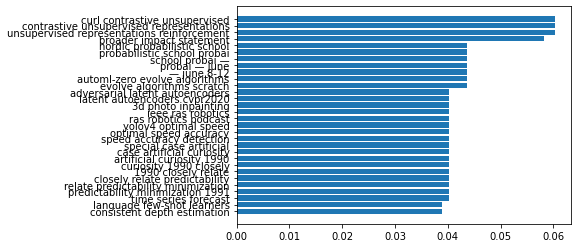

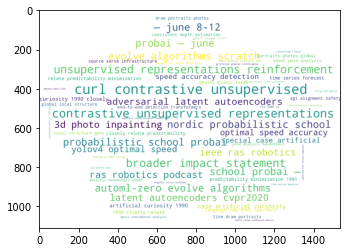

In [ ]:
#lemmatization 3-gram
import collections
import nltk
import os
from wordcloud import WordCloud
from PIL import Image, ImageColor 
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from sklearn import(
    datasets, feature_extraction
)
import matplotlib.pyplot as plt 
import numpy as np
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

from sklearn import feature_extraction

sa_stop_words=nltk.corpus.stopwords.words("english")

add_list = ["'s", "also",".",",","us","19.","?","thi", "hi","n't","'re"
            "''","coronavirus","covid-19","’",":","say","‘","report","may",
            "ha","'","``", "day", "video", "daily", "suggest","-", "%","discuss", "|", "theory", "post", "question",
            "daily","imag","comment","american", "show", "people",
            "image","videos", "video","suggestions", "suggestion", "discussion", "study","amid",
            "[", "]", "learn","model", ")","(","use","(","ml","project", "research","machine", "paper", 
            "ai", "data", "neural", "network", "deep", "gener","train", "n","code","dataset", "detect", "2020", "ani","!","doe",
            "''", "r","p","machin","whi", "new","engin", "object","analysi", "need","anyon", "comput",  "help", "python", "+", "open",
            "work","predict","transform","optim","librari","algorithm","classif", "implement","languag", 
            "read","vs", "best", "tool", "would","look", ";","problem", "get", "confer","one", "differ",
            "simpl","find","review", "base",  "publish","state","handl", "understand", "2","system", "news", "face", "explain","&" 
            ]
not_stopwords=[ 'against','no', 'nor','aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't",
 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
"wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't" 
#,'not' delete only in modelling
]

sa_stop_words.extend(add_list)        
sa_stop_words = list(set([word for word in sa_stop_words if word not in not_stopwords]))      


data_directory = 'youtube'
youtube_data=datasets.load_files(data_directory, shuffle =True)
print('Processing corpus: {} documents'.format(len(youtube_data.data)))


#stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

def tokenize(text):
        tokens = [word for word in nltk.word_tokenize(text)] 
        lemma = [wordnet_lemmatizer.lemmatize(item, pos="v") for item in tokens]
        return lemma
count_vectorizer = feature_extraction.text.CountVectorizer(
        lowercase=True,  # for demonstration, True by default
        tokenizer=tokenize,  # use the NLTK tokenizer
        min_df=1,  # minimum document frequency, i.e. the word must appear more than once.  
        ngram_range=(3, 3),
        stop_words=sa_stop_words
    )
#print('Count Vectorizer:\n')

X = count_vectorizer.fit_transform(youtube_data.data)
X = feature_extraction.text.TfidfTransformer().fit_transform(X)
#print(count_vectorizer.vocabulary_)


print('\nResulting matrix has {} data points and {} features.\n'.format(
    X.shape[0], X.shape[1]))
#print('Document 1: \n{}'.format(X[0].toarray()))


sum_words = X.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq[:30]

#select key and value from tuple
y=[val[1] for val in words_freq[:30]]
x=[val[0] for val in words_freq[:30]]

print(words_freq[0:30])

y_pos = np.arange(len(x))
# Create horizontal bars
plt.barh(y_pos, y)
# Create names on the y-axis
plt.yticks(y_pos, x)
plt.gca().invert_yaxis()
# Show graphic
plt.show()

#word cloud 
dict_w={}
for k,v in words_freq:
  dict_w[k]=v
cloud_mask = np.array(Image.open("cloud.png")) # cloud shape image
wc = WordCloud(stopwords=sa_stop_words,
                        background_color="white",#ImageColor.getcolor('#36394c', 'RGB')
                        width=400,
                        height=400,
                        scale=3,
                        mask=cloud_mask#,
                        #color_func=partial(color_func, dictionary=words_dict)
                        ).generate_from_frequencies(dict_w)
plt.imshow(wc)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Processing corpus: 3 documents


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'ve", '19', 'abov', 'becaus', 'befor', 'coronaviru', 'daili', 'dure', 'onc', 'onli', 'ourselv', 'peopl', 'studi', 'themselv', 'theori', 'veri', 'wa', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))



Resulting matrix has 3 data points and 2711 features.

[('pytorch', 0.44637577298957964), ('time', 0.3352289822660646), ('tensorflow', 0.3254251896089745), ('human', 0.2698989959683662), ('make', 0.2611275094269919), ('nlp', 0.26075477597218416), ('gin', 0.24947939575964206), ('reinforc', 0.2320695186467501), ('cnn', 0.22305839462042468), ('gpu', 0.22118621815279493), ('featur', 0.21685734973514653), ('text', 0.2095574507492242), ('seri', 0.1968298292450093), ('amp', 0.19615091032032206), ('speech', 0.19083827623429306), ('like', 0.1848948763715591), ('label', 0.18344263507988628), ('without', 0.18306990162507852), ('experi', 0.1816176603334057), ('googl', 0.16961615947502723), ('product', 0.16889003882919082), ('set', 0.16851730537438306), ('build', 0.16779118472854665), ('loss', 0.16163734156441767), ('/', 0.15945897962690841), ('graph', 0.15836012552626427), ('represent', 0.1579873920714565), ('approach', 0.1529324030079717), ('contrast', 0.15198093588242964), ('autoencod', 0.15146

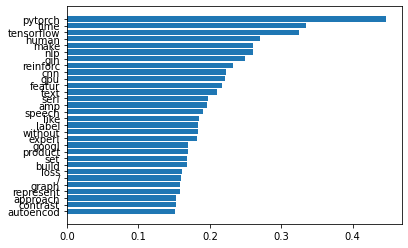

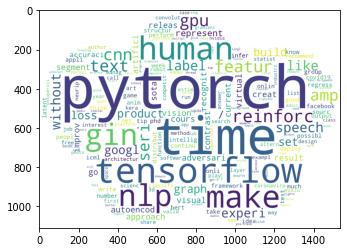

In [ ]:
#stemming and lemmatization 1-gram
import collections
import nltk
import os
from wordcloud import WordCloud
from PIL import Image, ImageColor 
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from sklearn import(
    datasets, feature_extraction
)
import matplotlib.pyplot as plt 
import numpy as np
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

from sklearn import feature_extraction

sa_stop_words=nltk.corpus.stopwords.words("english")

add_list = ["'s", "also",".",",","us","19.","?","thi", "hi","n't","'re"
            "''","coronavirus","covid-19","’",":","say","‘","report","may",
            "ha","'","``", "day", "video", "daily", "suggest","-", "%","discuss", "|", "theory", "post", "question",
            "daily","imag","comment","american", "show", "people",
            "image","videos", "video","suggestions", "suggestion", "discussion", "study","amid",
            "[", "]", "learn","model", ")","(","use","(","ml","project", "research","machine", "paper", 
            "ai", "data", "neural", "network", "deep", "gener","train", "n","code","dataset", "detect", "2020", "ani","!","doe",
            "''", "r","p","machin","whi", "new","engin", "object","analysi", "need","anyon", "comput",  "help", "python", "+", "open",
            "work","predict","transform","optim","librari","algorithm","classif", "implement","languag", 
            "read","vs", "best", "tool", "would","look", ";","problem", "get", "confer","one", "differ",
            "simpl","find","review", "base",  "publish","state","handl", "understand", "2","system", "news", "face", "explain","&" 
            ]

not_stopwords=[ 'against','no', 'nor','aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't",
 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
"wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't" 
#,'not' delete only in modelling
]

sa_stop_words.extend(add_list)        
sa_stop_words = list(set([word for word in sa_stop_words if word not in not_stopwords]))      


data_directory = 'youtube'
youtube_data=datasets.load_files(data_directory, shuffle =True)
print('Processing corpus: {} documents'.format(len(youtube_data.data)))


stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

def tokenize(text):
        tokens = [word for word in nltk.word_tokenize(text)] 
        stems = [stemmer.stem(item) for item in tokens]
        lemma = [wordnet_lemmatizer.lemmatize(word, pos="v") for word in stems]
        return lemma
count_vectorizer = feature_extraction.text.CountVectorizer(
        lowercase=True,  # for demonstration, True by default
        tokenizer=tokenize,  # use the NLTK tokenizer
        min_df=1,  # minimum document frequency, i.e. the word must appear more than once.  
        ngram_range=(1, 1),
        stop_words=sa_stop_words
    )
#print('Count Vectorizer:\n')

X = count_vectorizer.fit_transform(youtube_data.data)
X = feature_extraction.text.TfidfTransformer().fit_transform(X)
#print(count_vectorizer.vocabulary_)


print('\nResulting matrix has {} data points and {} features.\n'.format(
    X.shape[0], X.shape[1]))
#print('Document 1: \n{}'.format(X[0].toarray()))


sum_words = X.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq[:30]

#select key and value from tuple
y=[val[1] for val in words_freq[:30]]
x=[val[0] for val in words_freq[:30]]

print(words_freq[0:30])

y_pos = np.arange(len(x))
# Create horizontal bars
plt.barh(y_pos, y)
# Create names on the y-axis
plt.yticks(y_pos, x)
plt.gca().invert_yaxis()
# Show graphic
plt.show()

#word cloud 
dict_w={}
for k,v in words_freq:
  dict_w[k]=v
cloud_mask = np.array(Image.open("cloud.png")) # cloud shape image
wc = WordCloud(stopwords=sa_stop_words,
                        background_color="white",#ImageColor.getcolor('#36394c', 'RGB')
                        width=400,
                        height=400,
                        scale=3,
                        mask=cloud_mask#,
                        #color_func=partial(color_func, dictionary=words_dict)
                        ).generate_from_frequencies(dict_w)
plt.imshow(wc)